In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
sys.path.append('..')

In [4]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA, ConditionalPLSA

In [5]:
data_dir = '../data'
file = 'Full-Economic-News-DFE-839861.csv'

options = {
    'encoding': 'latin_1'
}

In [6]:
source = '/'.join([data_dir, file])

raw = pd.read_csv(source, **options)
raw.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [35]:
docs = raw.text.to_list()[:1000]

pipeline = Pipeline(*DEFAULT_PIPELINE)
corpus = Corpus(blogposts, pipeline)
corpus

Corpus:
Number of documents: 3103
Number of words:     15106

In [36]:
n_topics = 4

In [37]:
conditional_plsa = ConditionalPLSA(corpus, n_topics, True)
conditional_result = conditional_plsa.fit()
conditional_plsa

ConditionalPLSA:
Number of topics:     4
Number of documents:  3103
Number of words:      15106
Number of iterations: 24

In [38]:
visualize = Visualize(conditional_result)

In [44]:
plsa = PLSA(corpus, n_topics, True)
result = plsa.fit()
plsa

PLSA:
====
Number of topics:     4
Number of documents:  3103
Number of words:      15106
Number of iterations: 79

In [45]:
visualize = Visualize(result)

<IPython.core.display.Javascript object>


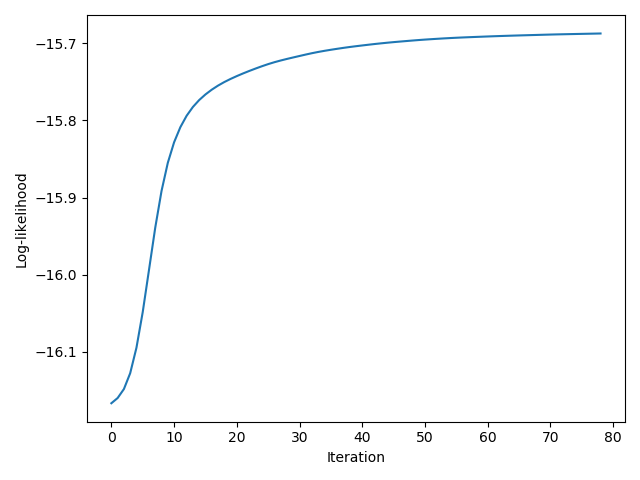

In [46]:
fig, ax = plt.subplots()
susi = visualize.convergence(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


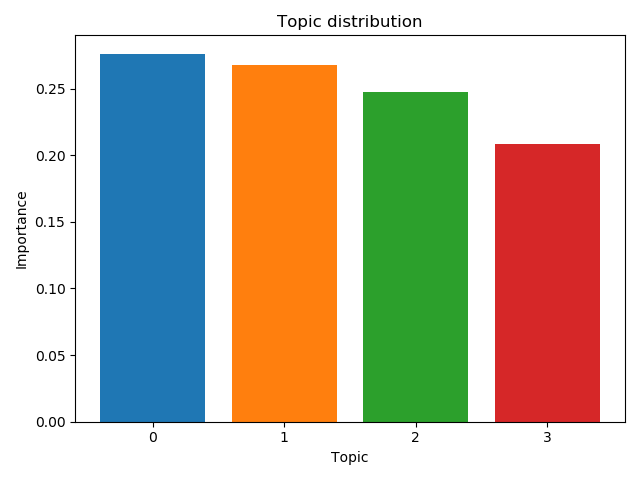

In [47]:
fig, ax = plt.subplots()
susi = visualize.topics(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


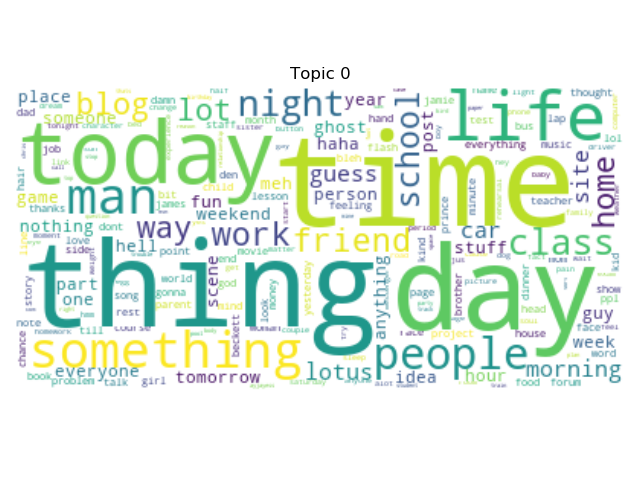

In [48]:
fig, ax = plt.subplots()
susi = visualize.words_in_topic(0, ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


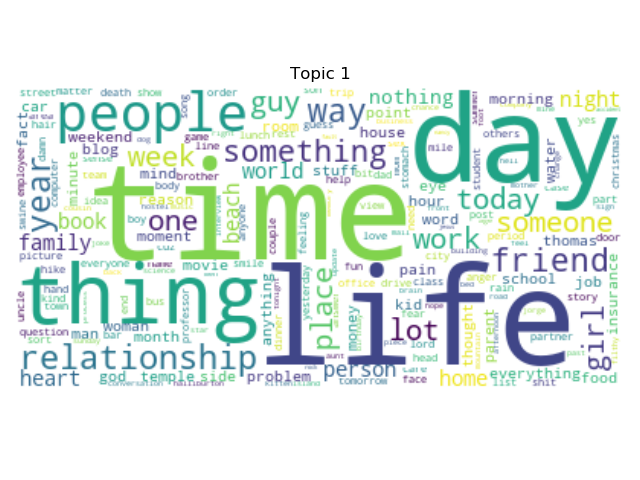

In [49]:
fig, ax = plt.subplots()
susi = visualize.words_in_topic(1, ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


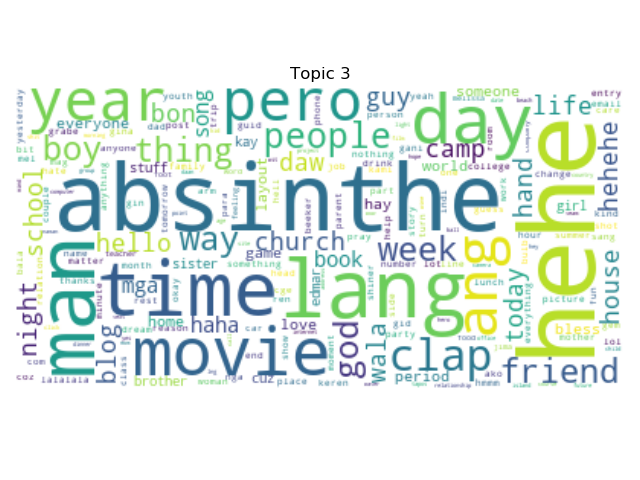

In [51]:
fig, ax = plt.subplots()
susi = visualize.words_in_topic(3, ax)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
susi = visualize.topics_in_doc(6, ax)
fig.tight_layout()

In [ ]:
array = result.topic_given_doc
sorting_indices = array.argsort(axis=0)
ordered = array[sorting_indices, np.arange(array.shape[1])]
tmp = np.zeros((n_topics+1, corpus.n_docs))
tmp[1:, :] = ordered
gini = 1 - (tmp[1:, :] - (tmp[1:, :] - tmp[:-1, :])/2).sum(axis=0) * (1/n_topics) / 0.5

In [ ]:
fig, ax = plt.subplots()
ax.hist(gini, bins=20)

In [ ]:
fig, ax = plt.subplots()
ax.hist(gini)

In [ ]:
x = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

1 - sum((x[i] - x[i-1])*(y[i] + y[i-1]) for i in range(1, 6))

In [34]:
import os

blogposts = []

for filename in os.listdir('../data/blogs')[:100]:
    print(filename)
    with open('../data/blogs/'+filename, encoding='latin_1') as file:
        new_post = False
        for line in file:
            if '<post>' in line:
                blogpost = ''
                new_post = True
            elif '</post>' in line:
                blogposts.append(blogpost)
                new_post = False
            if new_post:
                if '<post>' not in line:
                    blogpost = ''.join((blogpost, line.strip()))

3338497.female.15.Military.Sagittarius.xml
4195368.female.37.indUnk.Pisces.xml
4189466.female.23.Telecommunications.Aries.xml
3385427.male.24.Technology.Capricorn.xml
4138710.female.36.Sports-Recreation.Sagittarius.xml
3523199.male.33.Tourism.Sagittarius.xml
2431283.male.24.indUnk.Taurus.xml
4117634.male.23.Arts.Leo.xml
3518013.female.26.Technology.Pisces.xml
1286861.female.24.Student.Cancer.xml
676659.male.26.Technology.Leo.xml
3593261.male.15.Student.Libra.xml
4150492.female.24.RealEstate.Pisces.xml
4127092.female.24.indUnk.Pisces.xml
4072700.female.25.Arts.Aquarius.xml
3687003.male.16.indUnk.Virgo.xml
4128695.female.23.indUnk.Capricorn.xml
3943296.male.15.Non-Profit.Scorpio.xml
3968640.male.25.Maritime.Capricorn.xml
3363676.male.23.Internet.Libra.xml
3959551.female.15.Student.Virgo.xml
4013834.female.46.BusinessServices.Virgo.xml
3525349.male.23.indUnk.Taurus.xml
2210786.male.27.Arts.Capricorn.xml
599372.male.24.indUnk.Sagittarius.xml
3514361.female.42.Publishing.Sagittarius.xml
386

In [ ]:
x = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
y = np.array([0.0, 0.0, 0.0, 0.0, 1.0])

In [ ]:
(x.cumsum()*0.2).sum()

In [ ]:
(y.cumsum()*0.2).sum()